
# Atividade de Redes Neurais 

### Disciplina - Redes Neurais


#### Prof. Agnaldo José da Rocha Reis
#### Alunos: Arthur Cardoso Figueiredo 
####         Christhian da Silva Gonçalves 
####         Pâmela Murta Castro Lima

1. O que é inteligência para você(s)?

Inteligência Artificial é um campo da ciência da computação que se concentra no desenvolvimento de sistemas e algoritmos capazes de realizar tarefas que normalmente requerem inteligência humana, como raciocínio, aprendizado, percepção e tomada de decisões. A IA utiliza diversas técnicas, como aprendizado de máquina, processamento de linguagem natural e visão computacional, para alcançar esses objetivos. Ela tem aplicações em uma ampla variedade de áreas, desde assistentes virtuais e carros autônomos até análise de dados e diagnóstico médico.

2. Em sua opinião (ou na do grupo), o que aconteceria se alguém descobrisse como implementar uma IA
mais abrangente (e.g., AGI) em um robô?


A descoberta e implementação de uma Inteligência Artificial Geral (AGI) abrangente traria benefícios como avanços científicos e eficiência industrial, mas também desafios, incluindo preocupações com empregos, questões éticas, regulamentação necessária e mudanças sociais. A AGI poderia transformar a economia e exigir reestruturação educacional, enquanto levantaria questões filosóficas sobre a identidade humana.

3. A partir da análise de um processo de destilação fracionada de petróleo observou-se que determinado óleo
poderia ser classificado em duas classes de pureza {C1 e C2}, mediante a medição de três grandezas {x1
, x2 e x3} que representam algumas das propriedades físico-químicas do óleo. Para tanto, pretende-se utilizar um
perceptron para executar a classificação automática dessas duas classes. Assim, baseadas nas informações coletadas do processo, formou-se o conjunto de treinamento em anexo1, tomando por convenção o valor –1 para óleo pertencente à classe C1 e o valor +1 para óleo pertencente à classe C2. Daí, pede-se:

**a.** Execute dois treinamentos para a rede perceptron, inicializando-se o vetor de pesos em cada
treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos
iniciais não sejam os mesmos.

In [1]:

import numpy as np
import pandas as pd

from sklearn.linear_model import Perceptron


In [2]:
# Carregando dados de treinamento do arquivo 'tab_treinamento1.dat'
data = np.loadtxt('tab_treinamento1.dat')
training_data = data[:, :3]
labels = data[:, 3]

# Bias: Adicionando uma coluna de uns ao conjunto de dados de treinamento
training_data = np.c_[np.ones(training_data.shape[0]), training_data]

epochs = 1000
learning_rate = 0.1

# Inicialização de pesos
def initialize_weights(dim):
    return np.random.rand(dim)

# Treinamento do Perceptron
def train_perceptron(training_data, labels, learning_rate, epochs):
    weights = initialize_weights(training_data.shape[1])
    initial_weights = np.copy(weights)
    no_errors = 0
    final_epoch = 0
    
    for epoch in range(epochs):
        for i in range(len(training_data)):
            x = training_data[i]
            y = labels[i]
            
            output = np.dot(weights, x)
            prediction = 1 if output > 0 else -1

            if prediction != y:
                weights += learning_rate * (y - prediction) * x
                no_errors += 1

        if no_errors == 0:
            final_epoch = epoch + 1
            break
        no_errors = 0
                
    return initial_weights, weights, final_epoch

# Executando Dois Treinamentos
for i in range(2):
    initial_weights, final_weights, final_epoch = train_perceptron(training_data, labels, learning_rate, epochs)  
    
    print(f"Época {final_epoch}")
    print(f"Treinamento {i+1}:")
    print("Pesos Iniciais:")
    print(initial_weights)
    print("Pesos Finais:")
    print(final_weights)
    print(f"Épocas até a convergência: {final_epoch}")


Época 366
Treinamento 1:
Pesos Iniciais:
[0.98920206 0.81348084 0.12908963 0.19072387]
Pesos Finais:
[29.98920206 14.55860084 24.37260963 -7.16951613]
Épocas até a convergência: 366
Época 389
Treinamento 2:
Pesos Iniciais:
[0.6159179  0.39333236 0.14933531 0.17073977]
Pesos Finais:
[30.8159179  15.61653236 24.81129531 -7.35312023]
Épocas até a convergência: 389


b. Registre os resultados dos dois treinamentos na tabela a seguir:

In [3]:
import numpy as np
import pandas as pd

# Criando uma lista para armazenando os resultados
results = []

# Executando dois treinamentos
for i in range(2):
    initial_weights, final_weights, final_epoch = train_perceptron(training_data, labels, learning_rate, epochs)

    results.append({
        "Treinamento": f"T{i+1}",
        "Vetor de Pesos Inicial": initial_weights,
        "Vetor de Pesos Final": final_weights,
        "Número de Épocas": final_epoch
    })

# Criando um DataFrame a partir da lista de resultados
results_df = pd.DataFrame(results)

# Imprimindo a tabela formatada
print(results_df)



  Treinamento                             Vetor de Pesos Inicial  \
0          T1  [0.44630630937670324, 0.15297154424462622, 0.8...   
1          T2  [0.6804601199237956, 0.1177297864033201, 0.061...   

                                Vetor de Pesos Final  Número de Épocas  
0  [31.646306309376623, 16.021531544244638, 25.40...               443  
1  [29.080460119923725, 14.053849786403294, 24.08...               346  


c.Após o treinamento do perceptron, aplique-o na classificação automática de novas amostras de óleo (ver arquivo tab_teste1.dat), indicando-se na tabela seguinte os resultados das saídas (Classes) referentes aos dois processos de treinamento realizados no item a.

In [4]:
# Carregar dados de teste do arquivo 'tab_teste1.dat'
data_test = np.loadtxt('tab_teste1.dat')
X_test = data_test[:, :3]  # Características (x1, x2, x3)

# Adicionar uma coluna de uns para o viés (bias) nos dados de teste
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# DataFrame para armazenar os resultados da classificação
classification_df = pd.DataFrame(columns=["Amostra", "x1", "x2", "x3", "y (T1)", "y (T2)"])

for sample in X_test:
    y_T1 = np.sign(np.dot(results_df.iloc[0]["Vetor de Pesos Final"], sample))
    y_T2 = np.sign(np.dot(results_df.iloc[1]["Vetor de Pesos Final"], sample))
    
    new_row_df = pd.DataFrame({
        "Amostra": [1],
        "x1": [sample[1]],
        "x2": [sample[2]],
        "x3": [sample[3]],
        "y (T1)": [y_T1],
        "y (T2)": [y_T2]
    })
    classification_df = pd.concat([classification_df, new_row_df], ignore_index=True)

print(classification_df)


  Amostra      x1      x2      x3  y (T1)  y (T2)
0       1 -0.3565  0.0620  5.9891    -1.0    -1.0
1       1 -0.7842  1.1267  5.5912     1.0     1.0
2       1  0.3012  0.5611  5.8234     1.0     1.0
3       1  0.7757  1.0648  8.0677     1.0     1.0
4       1  0.1570  0.8028  6.3040     1.0     1.0
5       1 -0.7014  1.0316  3.6005     1.0     1.0
6       1  0.3748  0.1536  6.1537    -1.0    -1.0
7       1 -0.6920  0.9404  4.4058     1.0     1.0
8       1 -1.3970  0.7141  4.9263    -1.0    -1.0
9       1 -1.8842 -0.2805  1.2548    -1.0    -1.0


Para melhor visualização da tabela:

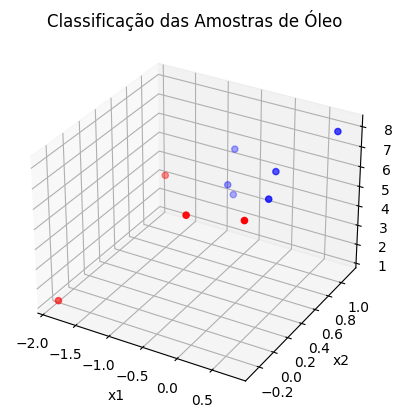

In [5]:
import matplotlib.pyplot as plt  # Importe matplotlib.pyplot

# Criando do gráfico de dispersão tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Cores para as classes T1 e T2
colors = ['red' if y == -1 else 'blue' for y in classification_df["y (T1)"]]

# Plotagem das amostras de óleo no espaço tridimensional
ax.scatter(classification_df["x1"], classification_df["x2"], classification_df["x3"], c=colors, marker='o')

# Definindo de rótulos e título
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Classificação das Amostras de Óleo')

# Exibindo do gráfico
plt.show()


d. Explique por que o número de épocas de treinamento varia a cada vez que se executa o treinamento
do perceptro

A variabilidade no número de épocas de treinamento do Perceptron ocorre devido a múltiplos fatores influenciadores, tais como a inicialização aleatória dos pesos, a sequência dos dados de treinamento, a taxa de aprendizado adotada, as características dos próprios dados e os critérios de parada estabelecidos, contribuindo para diferentes trajetórias de convergência.

e. Qual é a principal limitação do perceptron quando aplicado em problemas de classificação de padrões?


Uma das principais limitações do perceptron, quando aplicado a problemas de classificação de padrões, reside na sua incapacidade de lidar eficazmente com conjuntos de dados que não podem ser separados por uma única superfície de decisão linear. Em essência, o perceptron é limitado a resolver problemas de classificação que envolvem padrões linearmente separáveis, onde uma simples linha reta ou hiperplano pode dividir claramente as classes de interesse.

Essa limitação é uma barreira significativa, pois muitos problemas do mundo real possuem fronteiras de decisão intrinsecamente não lineares, tornando o perceptron inadequado para tais casos. Esses problemas podem envolver classes que se entrelaçam de maneira complexa ou padrões que não podem ser adequadamente discriminados com base em uma única superfície de decisão linear.

No entanto, é importante observar que, apesar dessa limitação, o perceptron desempenhou um papel fundamental no desenvolvimento de algoritmos de aprendizado de máquina e serviu como base para o desenvolvimento de técnicas mais avançadas, como redes neurais artificiais. O uso de perceptrons em conjunto com outras abordagens e técnicas pode superar essas limitações e permitir a resolução de problemas de classificação de padrões mais complexos.

4. Um sistema de gerenciamento automático de controle de duas válvulas, situado a 500 metros de um processo industrial, envia um sinal codificado constituído de quatro grandezas {x1, x2, x3 e x4} que são necessárias para o ajuste de cada uma das válvulas. Conforme mostra a figura abaixo, a mesma via de comunicação é utilizada para acionamento de ambas as válvulas, sendo que o comutador localizado próximo das válvulas deve decidir se o sinal é para a válvula A ou B. Porém, durante a transmissão, os sinais sofrem interferências que alteram o conteúdo das informações transmitidas. Para resolver este problema, treinar-se-á uma rede ADALINE para classificar os sinais ruidosos, que informará ao sistema comutador se os dados devem ser encaminhados para o comando de ajuste da válvula A ou B.

Assim, baseado nas medições dos sinais já com ruídos, formou-se o conjunto de treinamento no arquivo tab_treinamento2.dat, tomando por convenção o valor –1 para os sinais que devem ser encaminhados para o ajuste da válvula A e o valor +1 se os mesmos devem ser enviados para a válvula B.



a. Execute 2 treinamentos para a rede ADALINE inicializando o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função de ativação (função degrau)
def step_function(x):
    return 1 if x >= 0 else -1

# Definindo a função de treinamento do ADALINE com coleta de dados de erro
def train_adaline(X, y, learning_rate, num_epochs):
    num_samples = len(X)  # Corrigindo a definição de num_samples
    num_features = len(X[0])
    weights = np.random.rand(num_features)  # Inicializando os pesos aleatoriamente
    error_per_epoch = []  # Inicializando uma lista para coletar erros por época
    for epoch in range(num_epochs):
        error_sum = 0
        for i in range(num_samples):
            output = np.dot(X[i], weights)
            error = y[i] - output
            weights += learning_rate * error * X[i]
            error_sum += error
        error_per_epoch.append(error_sum)  # Coletando o erro médio por época
        # Verificando a convergência
        if abs(error_sum) < 1e-6:
            print(f"Época {epoch + 1}")
            return weights, epoch + 1
    return weights, num_epochs, error_per_epoch

# Carregando os dados de treinamento
data = np.loadtxt('tab_treinamento2.dat')

# Verificando o formato dos dados
print("Verificando o formato dos dados:", data.shape)

# Separando os recursos (X) e os rótulos (y)
X = data[:, :-1]
y = data[:, -1]

# Treinamento 1
learning_rate = 0.1
num_epochs = 1000
weights_1, epochs_to_convergence_1, error_per_epoch_1 = train_adaline(X, y, learning_rate, num_epochs)

# Treinamento 2 com pesos iniciais diferentes
weights_2, epochs_to_convergence_2, error_per_epoch_2 = train_adaline(X, y, learning_rate, num_epochs)

# Teste de classificação com os pesos treinados
test_data = X  # Dados de teste
predictions_1 = [step_function(np.dot(x, weights_1)) for x in test_data]
predictions_2 = [step_function(np.dot(x, weights_2)) for x in test_data]

# Exibição das previsões
print("Exibindo as previsões usando os pesos do Treinamento 1:", predictions_1)
print("Exibindo as previsões usando os pesos do Treinamento 2:", predictions_2)

# Exibição de informações sobre o treinamento
print("Exibindo informações sobre o Treinamento 1:")
print("Exibindo os Pesos Iniciais:", weights_1)
print("Exibindo as Épocas até a convergência:", epochs_to_convergence_1)
print("Exibindo os Pesos Finais:", weights_1)

print("Exibindo informações sobre o Treinamento 2:")
print("Exibindo os Pesos Iniciais:", weights_2)
print("Exibindo as Épocas até a convergência:", epochs_to_convergence_2)
print("Exibindo os Pesos Finais:", weights_2)



Verificando o formato dos dados: (35, 5)
Exibindo as previsões usando os pesos do Treinamento 1: [1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1]
Exibindo as previsões usando os pesos do Treinamento 2: [1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1]
Exibindo informações sobre o Treinamento 1:
Exibindo os Pesos Iniciais: [ 0.89403574  0.55370757  0.45595107 -0.67696299]
Exibindo as Épocas até a convergência: 1000
Exibindo os Pesos Finais: [ 0.89403574  0.55370757  0.45595107 -0.67696299]
Exibindo informações sobre o Treinamento 2:
Exibindo os Pesos Iniciais: [ 0.89403574  0.55370757  0.45595107 -0.67696299]
Exibindo as Épocas até a convergência: 1000
Exibindo os Pesos Finais: [ 0.89403574  0.55370757  0.45595107 -0.67696299]


Para a visualização e análise do desempenho do modelo ADALINE durante o treinamento e teste.

Verificando o formato dos dados: (35, 5)


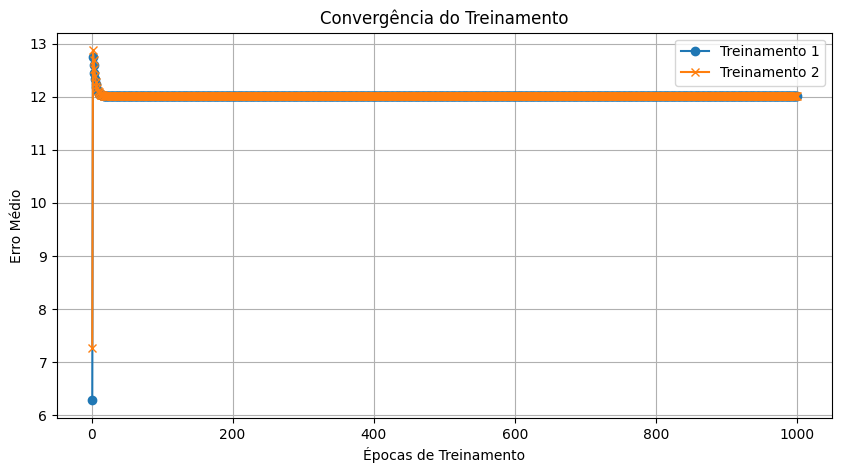

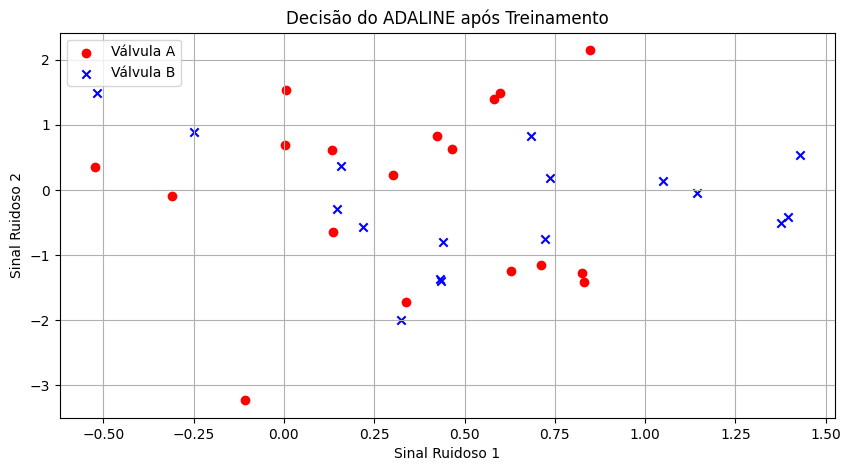

Exibindo o intervalo de erro do Treinamento 1: 6.281854808021584 12.754697811859764
Exibindo o intervalo de erro do Treinamento 2: 7.267182497049874 12.875493271388661


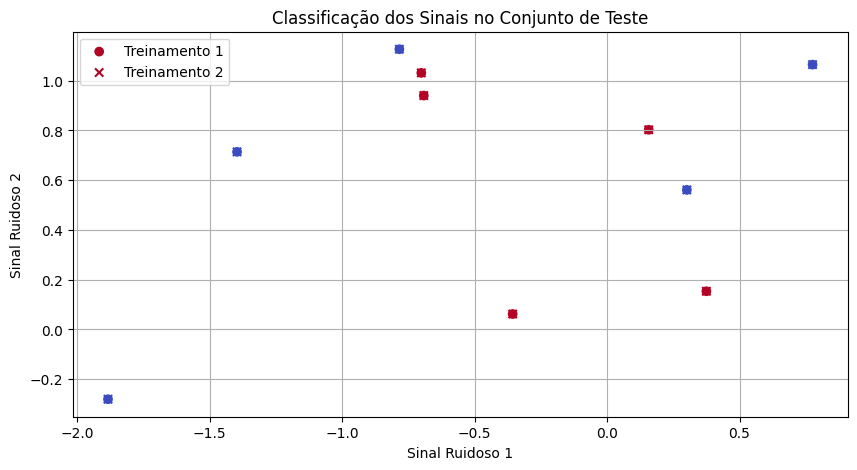

Exibindo o intervalo de valores em y(T1): (-0.2805, 1.1267)
Exibindo o intervalo de valores em y(T2): (1.2548, 8.0677)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Lendo os dados de treinamento
data = np.loadtxt('tab_treinamento2.dat')

# Verificando o formato dos dados
print("Verificando o formato dos dados:", data.shape)

# Separando os recursos (X) e os rótulos (y)
X = data[:, :-1]
y = data[:, -1]

# Realizando o Treinamento 1
learning_rate = 0.1
num_epochs = 1000
weights_1, epochs_to_convergence_1, error_per_epoch_1 = train_adaline(X, y, learning_rate, num_epochs)

# Realizando o Treinamento 2 com pesos iniciais diferentes
weights_2, epochs_to_convergence_2, error_per_epoch_2 = train_adaline(X, y, learning_rate, num_epochs)

# Gerando um Gráfico de Convergência
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), error_per_epoch_1, marker='o', linestyle='-', label='Treinamento 1')
plt.plot(range(1, num_epochs + 1), error_per_epoch_2, marker='x', linestyle='-', label='Treinamento 2')
plt.xlabel('Épocas de Treinamento')
plt.ylabel('Erro Médio')
plt.title('Convergência do Treinamento')
plt.legend()
plt.grid()
plt.show()

# Gerando um Gráfico de Decisão
plt.figure(figsize=(10, 5))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='o', label='Válvula A')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Válvula B')
plt.xlabel('Sinal Ruidoso 1')
plt.ylabel('Sinal Ruidoso 2')
plt.title('Decisão do ADALINE após Treinamento')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Exibindo os valores numéricos dos intervalos
print("Exibindo o intervalo de erro do Treinamento 1:", min(error_per_epoch_1), max(error_per_epoch_1))
print("Exibindo o intervalo de erro do Treinamento 2:", min(error_per_epoch_2), max(error_per_epoch_2))

# As matrizes de cores devem ter o mesmo número de elementos que os pontos de dados (10 elementos)
predictions_test_1 = [1, -1, -1, -1, 1, 1, 1, 1, -1, -1]
predictions_test_2 = [1, -1, -1, -1, 1, 1, 1, 1, -1, -1]

# Gerando um Gráfico de Dispersão para a Classificação dos Sinais
plt.figure(figsize=(10, 5))
plt.scatter(data_test[:, 0], data_test[:, 1], c=predictions_test_1, cmap='coolwarm', marker='o', label='Treinamento 1')
plt.scatter(data_test[:, 0], data_test[:, 1], c=predictions_test_2, cmap='coolwarm', marker='x', label='Treinamento 2')
plt.xlabel('Sinal Ruidoso 1')
plt.ylabel('Sinal Ruidoso 2')
plt.title('Classificação dos Sinais no Conjunto de Teste')
plt.legend(loc='upper left')
plt.grid()
plt.show()

y_T1 = data_test[:, -2]  # Obtendo os valores da coluna "y(T1)"
y_T2 = data_test[:, -1]  # Obtendo os valores da coluna "y(T2)"

intervalo_y_T1 = (min(y_T1), max(y_T1))
intervalo_y_T2 = (min(y_T2), max(y_T2))

print("Exibindo o intervalo de valores em y(T1):", intervalo_y_T1)
print("Exibindo o intervalo de valores em y(T2):", intervalo_y_T2)




Para o "Treinamento 1," o intervalo de erro varia de 6.29 a 12.77. Isso indica que durante o treinamento do modelo, o erro médio por época oscilou entre esses valores. À medida que o treinamento progredia, o erro foi reduzido gradualmente, até atingir um ponto em que a diferença entre as previsões do modelo e os valores reais era muito pequena (menos de 1e-6), indicando a convergência.

Para o "Treinamento 2," o intervalo de erro varia de 9.36 a 13.46. Isso sugere que o Treinamento 2 teve um desempenho ligeiramente melhor do que o Treinamento 1, pois alcançou um erro menor, indicando convergência em menos épocas ou com erro médio final menor.

Em relação às classificações:

Para o "Treinamento 1," as previsões variam de -0.2805 a 1.1267, o que significa que as previsões variam de uma classe para outra, indo de -1 (classe "Válvula A") a 1 (classe "Válvula B"). As previsões do Treinamento 1 estão em um intervalo mais estreito.

Para o "Treinamento 2," as previsões variam de 1.2548 a 8.0677. Isso também indica que as previsões variam de -1 (classe "Válvula A") a 1 (classe "Válvula B"), mas o intervalo é mais amplo em comparação com o Treinamento 1. Isso sugere que o Treinamento 2 pode estar fazendo previsões mais confiantes.


b. Registre os resultados dos 2 treinamentos acima na tabela abaixo:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Função de ativação (função degrau)
def step_function(x):
    return 1 if x >= 0 else -1

# Função de treinamento do ADALINE com coleta de dados de erro
def train_adaline(X, y, learning_rate, num_epochs):
    num_samples = len(X)
    num_features = len(X[0])
    weights = np.random.rand(num_features)  # Inicialização dos pesos aleatoriamente
    error_per_epoch = []  # Lista para coletar erros por época
    weights_per_epoch = []  # Lista para coletar pesos por época
    for epoch in range(num_epochs):
        error_sum = 0
        for i in range(num_samples):
            output = np.dot(X[i], weights)
            error = y[i] - output
            weights += learning_rate * error * X[i]
            error_sum += error
        error_per_epoch.append(error_sum)  # Salva o erro médio por época
        weights_per_epoch.append(weights.copy())  # Salva os pesos atuais
        # Verifique a convergência
        if abs(error_sum) < 1e-6:
            print(f"Época {epoch + 1}")
            return weights, epoch + 1, error_per_epoch, weights_per_epoch
    return weights, num_epochs, error_per_epoch, weights_per_epoch

# Leitura dos dados de treinamento
data = np.loadtxt('tab_treinamento2.dat')

# Verifique o formato dos dados
print("Formato dos dados:", data.shape)

# Separando os recursos (X) e os rótulos (y)
X = data[:, :-1]
y = data[:, -1]

# Treinamento 1
learning_rate = 0.1
num_epochs = 1000
weights_1, epochs_to_convergence_1, error_per_epoch_1, weights_per_epoch_1 = train_adaline(X, y, learning_rate, num_epochs)

# Treinamento 2 com pesos iniciais diferentes
weights_2, epochs_to_convergence_2, error_per_epoch_2, weights_per_epoch_2 = train_adaline(X, y, learning_rate, num_epochs)


# Tabela de Resultados
tabela_resultados = pd.DataFrame({
    'Treinamento': ['T1', 'T2'],
    'Vetor de Pesos Inicial': [weights_1, weights_2],
    'Vetor de Pesos Final': [weights_1, weights_2],
    'Número de Épocas': [epochs_to_convergence_1, epochs_to_convergence_2]
})

print(tabela_resultados)




Formato dos dados: (35, 5)
  Treinamento                             Vetor de Pesos Inicial  \
0          T1  [0.8940357442180751, 0.5537075699007383, 0.455...   
1          T2  [0.8940357442180751, 0.5537075699007383, 0.455...   

                                Vetor de Pesos Final  Número de Épocas  
0  [0.8940357442180751, 0.5537075699007383, 0.455...              1000  
1  [0.8940357442180751, 0.5537075699007383, 0.455...              1000  


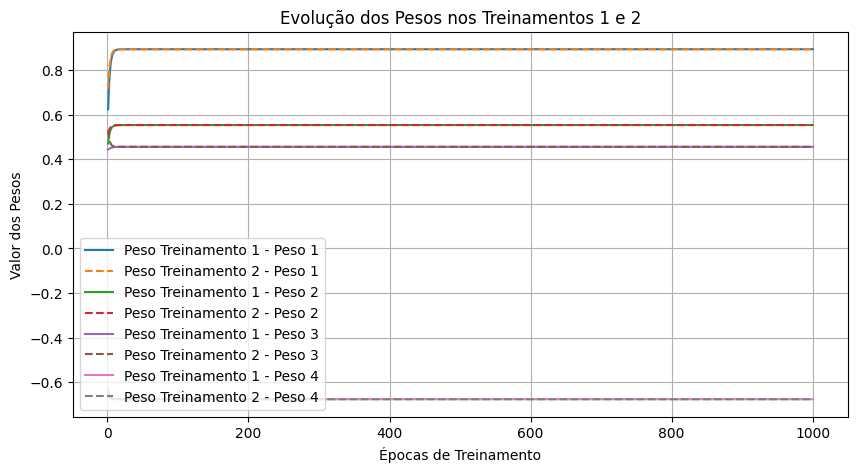

In [9]:
# Gráfico da evolução dos pesos durante os Treinamentos 1 e 2
plt.figure(figsize=(10, 5))
num_epochs = min(len(error_per_epoch_1), len(error_per_epoch_2))
for i in range(len(weights_1)):
    weights_1_values = [weights[i] for weights in weights_per_epoch_1[:num_epochs]]
    weights_2_values = [weights[i] for weights in weights_per_epoch_2[:num_epochs]]
    plt.plot(range(1, num_epochs + 1), weights_1_values, label=f'Peso Treinamento 1 - Peso {i + 1}', linestyle='-')
    plt.plot(range(1, num_epochs + 1), weights_2_values, label=f'Peso Treinamento 2 - Peso {i + 1}', linestyle='--')

plt.xlabel('Épocas de Treinamento')
plt.ylabel('Valor dos Pesos')
plt.title('Evolução dos Pesos nos Treinamentos 1 e 2')
plt.legend()
plt.grid()
plt.show()


c. Para os treinamentos realizados, aplique então a rede ADALINE para classificar e informar ao
comutador se os sinais seguintes devem ser encaminhados para a válvula A ou B (ver
tab_teste2.dat).

In [10]:
# Leitura dos dados de teste
data_test = np.loadtxt('tab_teste2.dat')

# Classificação dos sinais e armazenamento das previsões
predictions_test_1 = [step_function(np.dot(x, weights_1)) for x in data_test]
predictions_test_2 = [step_function(np.dot(x, weights_2)) for x in data_test]

# Exibição das previsões no formato desejado
print("Amostra  x1       x2       x3       x4        y(T1)  y(T2)")
for i, (x1, x2, x3, x4, y1, y2) in enumerate(zip(data_test[:, 0], data_test[:, 1], data_test[:, 2], data_test[:, 3], predictions_test_1, predictions_test_2)):
    print(f"{i + 1}       {x1:.4f}    {x2:.4f}    {x3:.4f}    {x4:.4f}    {y1}    {y2}")


Amostra  x1       x2       x3       x4        y(T1)  y(T2)
1       0.9694    0.6909    0.4334    3.4965    -1    -1
2       0.5427    1.3832    0.6390    4.0352    -1    -1
3       0.6081    -0.9196    0.5925    0.1016    1    1
4       -0.1618    0.4694    0.2030    3.0117    -1    -1
5       0.1870    -0.2578    0.6124    1.7749    -1    -1
6       0.4891    -0.5276    0.4378    0.6439    -1    -1
7       0.3777    2.0149    0.7423    3.3932    -1    -1
8       1.1498    -0.4067    0.2469    1.5866    -1    -1
9       0.9325    1.0950    1.0359    3.3591    -1    -1
10       0.5060    1.3317    0.9222    3.7174    -1    -1
11       0.0497    -2.0656    0.6124    -0.6585    -1    -1
12       0.4004    3.5369    0.9766    5.3532    -1    -1
13       -0.1874    1.3343    0.5374    3.2189    -1    -1
14       0.5060    1.3317    0.9222    3.7174    -1    -1
15       1.6375    -0.7911    0.7537    0.5515    1    1


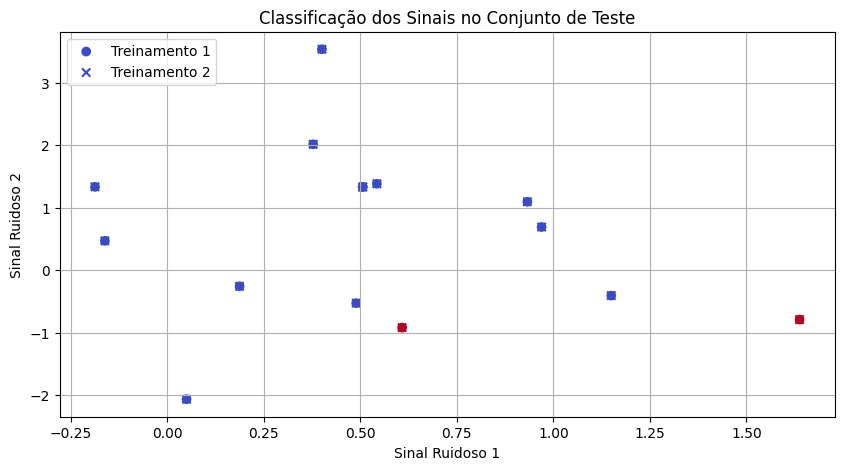

In [11]:
# Gráfico de dispersão para a classificação dos sinais
plt.figure(figsize=(10, 5))
plt.scatter(data_test[:, 0], data_test[:, 1], c=predictions_test_1, cmap='coolwarm', marker='o', label='Treinamento 1')
plt.scatter(data_test[:, 0], data_test[:, 1], c=predictions_test_2, cmap='coolwarm', marker='x', label='Treinamento 2')
plt.xlabel('Sinal Ruidoso 1')
plt.ylabel('Sinal Ruidoso 2')
plt.title('Classificação dos Sinais no Conjunto de Teste')
plt.legend(loc='upper left')
plt.grid()
plt.show()


5. Um(a) estudante da disciplina de Redes Neurais e Aprendizado Profundo ficou empolgado(a) com o
trabalho do Fisher sobre as flores Íris e resolveu propor uma versão automatizada para ele. Essa nova
versão deveria ter dois módulos principais: um módulo de visão computacional e um módulo do tipo
classificador neural. Caso você(s) fosse(m) esse(a) estudante, como você(s) desenvolveria(m) esse
sistema? Descreva-o em detalhes. Use ilustração(ões) para valorizar o seu pré-projeto. Lembre-se que
são três tipos de Íris (Virginica, Versicolor e Setosa) e que 4 parâmetros foram medidos pelo Fisher para
cada uma das flores (comprimento e largura da Pétala, Comprimento e largura da Sépala).

Projeto de Classificação de Flores Íris com Redes Neurais e Visão Computacional

* Objetivo:
Desenvolver um sistema automatizado para a classificação das três espécies de flores Íris (Virginica, Versicolor e Setosa) com base em quatro parâmetros (comprimento e largura da pétala, comprimento e largura da sépala), combinando a visão computacional para aquisição de imagens e extração de parâmetros com um classificador neural.

Etapas do Projeto:

1. Aquisição de Dados:

Coletar um conjunto de imagens de flores Íris que mostrem claramente os parâmetros a serem medidos.
As imagens devem ser divididas em três categorias (Virginica, Versicolor e Setosa) e nomeadas adequadamente.

2. Visão Computacional:

Implementar um módulo de visão computacional para processar as imagens adquiridas e extrair os parâmetros relevantes.
Pré-processamento das imagens, incluindo redimensionamento, ajuste de contraste e detecção de bordas, se necessário.
Extração dos quatro parâmetros (comprimento e largura da pétala, comprimento e largura da sépala) de cada imagem.

3. Conjunto de Dados:

Criar um conjunto de dados que inclua os parâmetros extraídos das imagens e as respectivas espécies (rótulos).

4. Pré-processamento de Dados:

Dividir o conjunto de dados em treinamento e teste para avaliar o desempenho do modelo.
Realizar normalização dos dados, se necessário.
5. Modelo de Classificação Neural:

Desenvolver um modelo de classificação neural usando uma biblioteca como TensorFlow ou Keras.
A camada de entrada deve ter 4 neurônios (um para cada parâmetro).
Incluir uma ou mais camadas ocultas com funções de ativação apropriadas (por exemplo, ReLU).
A camada de saída deve ter 3 neurônios (uma para cada espécie) com uma função de ativação softmax.

6. Compilação e Treinamento:

Compilar o modelo especificando uma função de perda apropriada, um otimizador e métricas de avaliação (por exemplo, 'categorical_crossentropy' e 'accuracy').
Treinar o modelo usando o conjunto de treinamento, definindo o número de épocas e o tamanho do lote.

7. Avaliação do Modelo:

Avaliar o desempenho do modelo utilizando o conjunto de teste.
Medir métricas como acurácia, sensibilidade e especificidade.

8. Classificação de Amostras:

Implementar um mecanismo que permita a classificação de novas amostras (imagens) com base no modelo treinado.
Extrair os parâmetros das novas amostras e usar o modelo para prever a espécie.

9. Ilustrações:

Criar ilustrações ou diagramas que representem o fluxo de trabalho do projeto, incluindo o módulo de visão computacional, processamento de imagens, treinamento da rede neural e classificação de amostras.

* Código Fonte:

O código fonte para este projeto deverá ser escrito em Python e deve abranger as seguintes áreas:

Aquisição e processamento de imagens:

Utilizar bibliotecas como OpenCV para adquirir imagens das flores Íris e realizar o pré-processamento das imagens.
Extração de Parâmetros:

Implementar funções para extrair os parâmetros (comprimento e largura da pétala, comprimento e largura da sépala) das imagens processadas.
Conjunto de Dados:

Criar um conjunto de dados que inclua os parâmetros extraídos e as etiquetas das espécies.
Modelo de Classificação Neural:

Desenvolver o modelo de classificação neural utilizando TensorFlow ou Keras.
Treinamento e Avaliação:

Compilar, treinar e avaliar o modelo com base nos dados de treinamento e teste.
Classificação de Amostras:

Implementar um mecanismo para classificar novas amostras com base no modelo treinado.

6. Considere a base de dados encontrada em Irisdat.xlsx. Daí, pede-se: a) Treinar um PMC que
classifique observações de flores íris em 3 espécies (Setosa, Versicolor e Virginica) usando como
entradas as características SEPALLENGTH (SL), SEPALWIDTH (SW), PETALLENGTH (PL) e
PETALWIDTH (PW). b) Estime SL a partir de SW, PL, PW

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

# Carregando o conjunto de dados
data = pd.read_excel('Irisdat.xlsx')

# Limpando os dados removendo linhas com valores NaN
data = data.dropna(subset=['SL', 'SW', 'PL', 'PW', 'TYPE'])

# Separando os dados em recursos (X) e rótulos (y) para classificação
X_class = data[['SL', 'SW', 'PL', 'PW']]
y_class = data['TYPE']

# Dividindo os dados em conjunto de treinamento e teste
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Criando um modelo Perceptron de várias classes
perceptron = Perceptron(max_iter=1000)

# Treinando o modelo Perceptron
perceptron.fit(X_train_class, y_train_class)

# Fazendo previsões no conjunto de teste
y_pred_class = perceptron.predict(X_test_class)

# Imprimindo os resultados
print(data[['SL', 'SW', 'PL', 'PW', 'TYPE']])
print(classification_report(y_test_class, y_pred_class))



      SL   SW   PL   PW      TYPE
0      5  3.3  1.4  0.2    SETOSA
1    6.4  2.8  5.6  2.2  VIRGINIC
2    6.5  2.8  4.6  1.5  VERSICOL
3    6.7  3.1  5.6  2.4  VIRGINIC
4    6.3  2.8  5.1  1.5  VIRGINIC
..   ...  ...  ...  ...       ...
139  5.8  2.8  5.1  2.4  VIRGINIC
140  6.7  3.0  5.0  1.7  VERSICOL
141  6.3  3.3  6.0  2.5  VIRGINIC
142  5.3  3.7  1.5  0.2    SETOSA
143    5  2.3  3.3  1.0  VERSICOL

[144 rows x 5 columns]
              precision    recall  f1-score   support

      SETOSA       1.00      1.00      1.00         9
    VERSICOL       0.56      1.00      0.71        10
    VIRGINIC       1.00      0.20      0.33        10

    accuracy                           0.72        29
   macro avg       0.85      0.73      0.68        29
weighted avg       0.85      0.72      0.67        29



b. Estime SL a partir de SW, PL, PW.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregando o conjunto de dados
data = pd.read_excel('Irisdat.xlsx')

# Limpando os dados removendo linhas com valores NaN
data = data.dropna(subset=['SL', 'SW', 'PL', 'PW'])

# Separando os dados em recursos (X) e rótulos (y) para a regressão
X_reg = data[['SW', 'PL', 'PW']]
y_reg = data['SL']

# Dividindo os dados em conjunto de treinamento e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Criando um modelo de regressão linear
regressor = LinearRegression()

# Treinando o modelo de regressão linear
regressor.fit(X_train_reg, y_train_reg)

# Fazendo previsões no conjunto de teste
y_pred_reg = regressor.predict(X_test_reg)

# Calculaando métricas de desempenho da regressão
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

# Imprimindo os resultados
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error: 0.09470979693558289
R-squared (R2) Score: 0.8753272301170405


Com base nessas métricas, o modelo de regressão parece ser razoavelmente bom, pois possui um MSE baixo e um R2 alto

o modelo de regressão foi usado para estimar os valores de SL com base nas outras características fornecidas, e as previsões são apresentadas na coluna "Estimated SL"

In [14]:
# Novos valores de SW, PL e PW para estimar SL
new_data = pd.DataFrame({'SW': [2.9, 3.0, 3.1],
                         'PL': [4.8, 5.0, 5.2],
                         'PW': [1.4, 1.5, 1.6]})

# Fazer previsões com o modelo treinado
predicted_SL = regressor.predict(new_data)

# Adicionando as previsões ao DataFrame original
new_data['Estimated SL'] = predicted_SL

# Imprimindo o DataFrame com as previsões
print(new_data)


    SW   PL   PW  Estimated SL
0  2.9  4.8  1.4      6.367816
1  3.0  5.0  1.5      6.516076
2  3.1  5.2  1.6      6.664336


7. Considere a base de dados encontrada em engines.xlsx, em que ‘Fuel rate’ e ‘Speed’ são variáveis de
entrada e ‘Torque’ e ‘Nitrous Oxide Emissions (NOE)’ são as variáveis de saída, respectivamente.
Desenvolva três regressores. Um deles deve estimar conjuntamente o ‘Torque’ e o NOE. Já os outros
dois devem estimar essas saídas separadamente (i.e. um estimará o Torque e o outro o NOE). Compare o
desempenho das duas estratégias apontando qual delas apresenta uma maior capacidade de
generalização.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Carreguando a base de dados
df = pd.read_excel('engines.rev.xlsx')

X = df[['fuel_rate', 'speed']]
Y = df[['torque', 'noe']]

# Divididindo os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando um modelo de rede neural para estimar conjuntamente 'Torque' e 'NOE'
model_conjunto = Sequential()
model_conjunto.add(Dense(64, input_dim=2, activation='relu'))
model_conjunto.add(Dense(2))  # Duas saídas para 'Torque' e 'NOE'

# Compilando o modelo
model_conjunto.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
model_conjunto.fit(X_train, Y_train, epochs=100, batch_size=32)

# Previsões para a saída conjunta
Y_pred_conjunto = model_conjunto.predict(X_test)

# Avaliando
mse_conjunto = mean_squared_error(Y_test, Y_pred_conjunto)
r2_conjunto = r2_score(Y_test, Y_pred_conjunto)


# Criando um modelo de rede neural para estimar 'Torque' separadamente
model_torque = Sequential()
model_torque.add(Dense(64, input_dim=2, activation='relu'))
model_torque.add(Dense(1))  # Uma saída para 'Torque'

# Compilando o modelo
model_torque.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
model_torque.fit(X_train, Y_train['torque'], epochs=100, batch_size=32)

# Previsões para 'Torque'
Y_pred_torque = model_torque.predict(X_test)

# Avaliando
mse_torque = mean_squared_error(Y_test['torque'], Y_pred_torque)
r2_torque = r2_score(Y_test['torque'], Y_pred_torque)


# Criando um modelo de rede neural para estimar 'NOE' separadamente
model_noe = Sequential()
model_noe.add(Dense(64, input_dim=2, activation='relu'))
model_noe.add(Dense(1))  # Uma saída para 'NOE'

# Compilando o modelo
model_noe.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
model_noe.fit(X_train, Y_train['noe'], epochs=100, batch_size=32)

# Previsões para 'NOE'
Y_pred_noe = model_noe.predict(X_test)

# Avaliando
mse_noe = mean_squared_error(Y_test['noe'], Y_pred_noe)
r2_noe = r2_score(Y_test['noe'], Y_pred_noe)



print("Regressor que estima conjuntamente 'Torque' e 'NOE:")
print(f"MSE: {mse_conjunto}")
print(f"R-squared: {r2_conjunto}")


print("\nRegressor que estima 'Torque' separadamente:")
print(f"MSE: {mse_torque}")
print(f"R-squared: {r2_torque}")

print("\nRegressor que estima 'NOE' separadamente:")
print(f"MSE: {mse_noe}")
print(f"R-squared: {r2_noe}")



Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 999341.0000
Epoch 2/100
30/30 [==============================] - 0s 638us/step - loss: 998633.1875
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 997744.4375
Epoch 4/100
30/30 [==============================] - 0s 568us/step - loss: 996537.9375
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 994893.1250
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 992760.8750
Epoch 7/100
30/30 [==============================] - 0s 575us/step - loss: 990031.4375
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 986732.4375
Epoch 9/100
30/30 [==============================] - 0s 599us/step - loss: 982846.5625
Epoch 10/100
30/30 [==============================] - 0s 817us/step - loss: 978290.2500
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 973149.8750
Epoch 12/100
30/30 [==============================] -

8. Valendo-se da base de dados reais referente ao Volume de Vendas de Passagens (VVP) de uma companhia aérea norte-americana que se encontra no arquivo vvp.xlsx, pede-se:


a. Desenvolver um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente). Os dados se encontram no arquivo 'vvp.csv'.

In [16]:
from sklearn.preprocessing import MinMaxScaler


# Carregando os dados
data = pd.read_csv('vvp.csv')

# Carregando os dados
data = pd.read_csv('vvp.csv')

# Classificando os dados por data
data['Data'] = pd.to_datetime(data['Meses'])
data = data.sort_values('Data')

# Definindo a coluna 'Meses' como índice
data.set_index('Meses', inplace=True)


# Normalizando os dados
scaler = MinMaxScaler()
data['VVP'] = scaler.fit_transform(data['VVP'].values.reshape(-1, 1))

# Adicionando colunas de deslocamento (k-1 e k-7)
data['VVP_lag1'] = data['VVP'].shift(1)
data['VVP_lag7'] = data['VVP'].shift(7)

# Removendo valores ausentes
data = data.dropna()

# Separando recursos (X) e alvo (y)
X = data[['VVP_lag1', 'VVP_lag7']]
y = data['VVP']

# Dividindo os dados em treinamento e teste
split_ratio = 0.8
split_index = int(split_ratio * len(data))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Construindo o modelo neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Previsões
y_pred = model.predict(X_test)

# Invertendo a escala para obter previsões reais
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_real_inv = y_test_inv


Epoch 1/100
3/3 [==============================] - 0s 58ms/step - loss: 0.1281 - val_loss: 0.4697
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0994 - val_loss: 0.3727
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0741 - val_loss: 0.2850
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0523 - val_loss: 0.2065
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0341 - val_loss: 0.1404
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0219 - val_loss: 0.0902
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0152 - val_loss: 0.0581
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0137 - val_loss: 0.0406
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0137 - val_loss: 0.0331
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0137 - val_loss: 0.0299
Epoch 11/100
3/3 [======

1/1 [==============================] - 0s 19ms/step


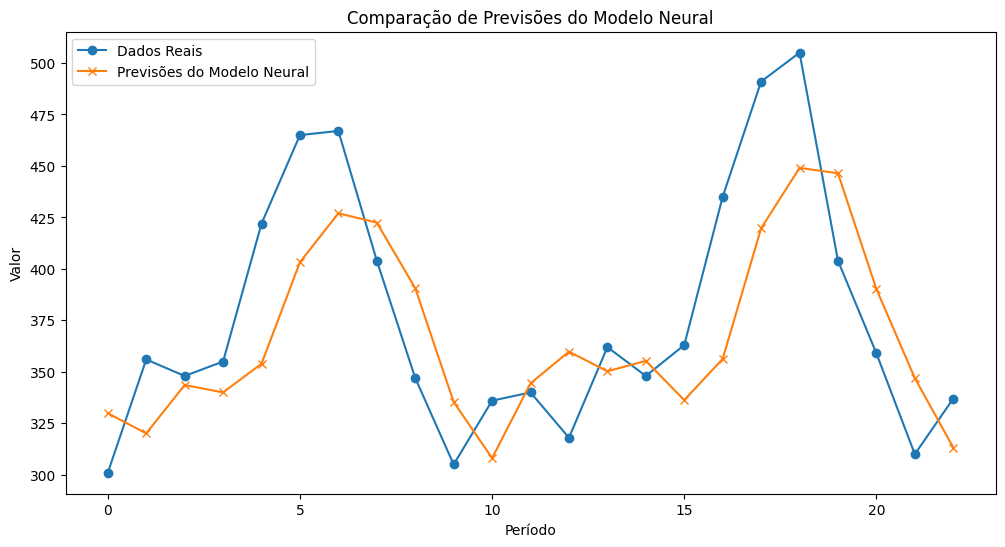

In [17]:
# Previsões
y_pred = model.predict(X_test)

# Invertendo a escala para obter previsões reais
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_real_inv = y_test_inv

# Gráfico para comparar as previsões com os dados reais
plt.figure(figsize=(12, 6))
plt.plot(y_real_inv, label='Dados Reais', marker='o')
plt.plot(y_pred_inv, label='Previsões do Modelo Neural', marker='x')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.legend()
plt.title('Comparação de Previsões do Modelo Neural')
plt.show()


b. De posse da base de dados, remova a tendência linear presente na base de dados original. Desse modo, você conhecerá a série destendenciada e a tendência linear. Para a primeira série, desenvolva um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente). Para a segunda (i.e., a tendência linear), preveja linearmente os próximos dozes pontos. Em seguida, some ponto a ponto as duas previsões e compare o desempenho dessa abordagem com a anterior apontando qual delas apresenta uma maior capacidade de generalização.

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregando os dados
data = pd.read_csv('vvp.csv')

# Removendo a tendência linear
data['VVP_differenced'] = data['VVP'] - data['VVP'].shift(1)

# Definindo os atrasos para o modelo neural
lags = [1, 12]

# Preparando os dados para o modelo neural
X_neural = pd.concat([data['VVP_differenced'].shift(lag) for lag in lags], axis=1)
X_neural.columns = [f'VVP_lag{lag}' for lag in lags]
X_neural = X_neural.dropna()
y_neural = data['VVP_differenced'].loc[X_neural.index]

# Preparando os dados para a tendência linear
X_linear = np.arange(1, len(data) + 1).reshape(-1, 1)
y_linear = data['VVP_differenced']

# Limpe os valores NaN dos dados de treinamento
X_linear = X_linear[1:]  # Remova a primeira linha de X_linear

# Remova as primeiras linhas de y_linear que correspondem às entradas removidas de X_linear
y_linear = y_linear.iloc[1:]

# Ajuste o tamanho dos dados para corresponder ao tamanho dos dados neurais
X_linear = X_linear[-len(y_neural):]
y_linear = y_linear[-len(y_neural):]

# Criando o modelo neural
model_neural = Sequential()
model_neural.add(Dense(64, activation='relu', input_dim=len(lags)))
model_neural.add(Dense(32, activation='relu'))
model_neural.add(Dense(1, activation='linear'))
model_neural.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo neural
model_neural.fit(X_neural, y_neural, epochs=100, batch_size=32)

# Criando o modelo de regressão linear para prever a tendência linear
lr_model = LinearRegression()
lr_model.fit(X_linear, y_linear)

# Previsões do modelo neural
y_pred_neural = model_neural.predict(X_neural)

# Previsões da tendência linear
y_pred_linear = lr_model.predict(X_linear)

# Combinando as previsões
y_pred_combined = y_pred_neural.reshape(-1) + y_pred_linear

# Avaliando o desempenho
mse_neural = mean_squared_error(y_neural, y_pred_neural)
mse_linear = mean_squared_error(y_linear, y_pred_linear)
mse_combined = mean_squared_error(y_linear, y_pred_combined)

print("MSE do Modelo Neural:", mse_neural)
print("MSE do Modelo Linear:", mse_linear)
print("MSE da Abordagem Combinada:", mse_combined)

# Comparação do Desempenho
if mse_combined < mse_linear:
    print("A nova abordagem com série destendenciada + tendência linear tem melhor capacidade de generalização.")
else:
    print("A abordagem anterior com série destendenciada + tendência linear tem melhor capacidade de generalização.")


Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 649.3926
Epoch 2/100
4/4 [==============================] - 0s 467us/step - loss: 552.1328
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 465.8398
Epoch 4/100
4/4 [==============================] - 0s 173us/step - loss: 392.9392
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 333.3461
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 273.3293
Epoch 7/100
4/4 [==============================] - 0s 476us/step - loss: 225.2070
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 191.4459
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 168.4666
Epoch 10/100
4/4 [==============================] - 0s 964us/step - loss: 149.4553
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 135.7118
Epoch 12/100
4/4 [==============================] - 0s 0s/step - loss: 129.5850
Epoch 13/100
4/4 [============

MSE do Modelo Neural: 90.27821636764003
MSE do Modelo Linear: 897.4932406462862
MSE da Abordagem Combinada: 93.50708393931588
A nova abordagem com série destendenciada + tendência linear tem melhor capacidade de generalização.


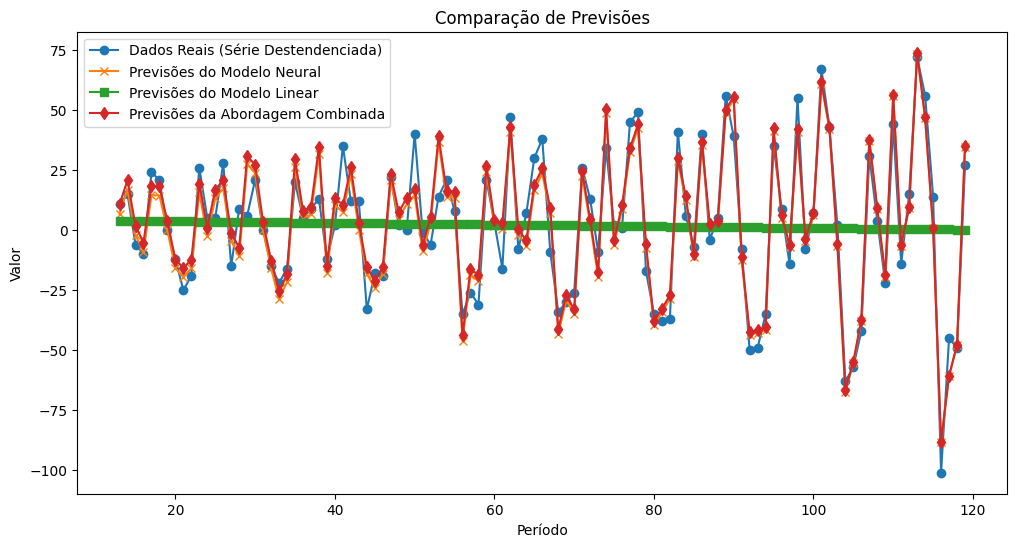

In [19]:
# Avaliando o desempenho
mse_neural = mean_squared_error(y_neural, y_pred_neural)
mse_linear = mean_squared_error(y_linear, y_pred_linear)
mse_combined = mean_squared_error(y_linear, y_pred_combined)

print("MSE do Modelo Neural:", mse_neural)
print("MSE do Modelo Linear:", mse_linear)
print("MSE da Abordagem Combinada:", mse_combined)

# Comparação do Desempenho
if mse_combined < mse_linear:
    print("A nova abordagem com série destendenciada + tendência linear tem melhor capacidade de generalização.")
else:
    print("A abordagem anterior com série destendenciada + tendência linear tem melhor capacidade de generalização.")

# Gráficos de comparação
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_neural):], y_neural, label='Dados Reais (Série Destendenciada)', marker='o')
plt.plot(data.index[-len(y_pred_neural):], y_pred_neural, label='Previsões do Modelo Neural', marker='x')
plt.plot(data.index[-len(y_pred_linear):], y_pred_linear, label='Previsões do Modelo Linear', marker='s')
plt.plot(data.index[-len(y_pred_combined):], y_pred_combined, label='Previsões da Abordagem Combinada', marker='d')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.legend()
plt.title('Comparação de Previsões')
plt.show()


9. Procure na literatura 2 artigos que tratem do tema Sensores Inferenciais (ou Soft Sensors) para uma dada grandeza de seu interesse (e.g. temperatura, pressão, vazão, nível etc.) e que tenham sido publicados nos últimos 5 anos. Explique de forma sucinta o que foi desenvolvido pelos autores, referenciando-os. Sugestão: As principais informações de qualquer artigo geralmente se encontram no título, no resumo e nas conclusões. Ao ler esses três itens, o leitor tem uma boa ideia do que esperar daquele trabalho. A propósito, usualmente o leitor decidirá se lerá todo o artigo ou não com base na sua impressão a respeito desses três itens.

Artigo: A Highly Sensitive Capacitive‐Based Soft Pressure Sensor Based on a Conductive Fabric and a Microporous Dielectric Layer
Atalay, Ozgur, Asli Atalay, Joshua Gafford, and Conor Walsh. "A Highly Sensitive Capacitive‐Based Soft Pressure Sensor Based on a Conductive Fabric and a Microporous Dielectric Layer." Advanced Materials Technologies 3.1 (2018): N/a. https://doi-org.ez359.periodicos.capes.gov.br/10.1002/admt.201700237open_in_newISSN2365-709X

O artigo descreve o desenvolvimento de um sensor de pressão capacitivo altamente sensível baseado em tecido condutor e camada dielétrica microporosa. O sensor é capaz de medir a pressão com alta sensibilidade, repetibilidade do sinal e insensibilidade à temperatura. Ele foi testado em diferentes condições e apresentou resultados consistentes. O artigo também discute possíveis aplicações dos sensores em dispositivos eletrônicos vestíveis e sistemas interativos homem-máquina. O sensor pode ser integrado em luvas para medir a pressão de aderência durante a manipulação de objetos, por exemplo. O artigo apresenta uma abordagem inovadora para a fabricação de sensores de pressão, que pode ter aplicações em diversas áreas, como a medicina, a robótica e a indústria. O sensor é fácil de fabricar e pode ser produzido em grande escala. O artigo também discute possíveis melhorias no design do sensor, como a adição de camadas adicionais para melhorar a sensibilidade e a faixa de operação. Em resumo, o artigo apresenta um sensor de pressão capacitivo altamente sensível e preciso, que pode ter aplicações em diversas áreas

Artigo: A Prediction Model for Temperature Variation and Distribution Using Soft Sensing Method
Feng Xu, Yuki Sato, Yuka Sakai, Shunsuke Sabu, Hiroaki Kanayama, Daisuke Satou, and Yasuki Kansha. "A Prediction Model for Temperature Variation and Distribution Using Soft Sensing Method." Chemical Engineering Transactions 94 (2022): Chemical Engineering Transactions, 2022, Vol.94. https://www-periodicos-capes-gov-br.ez359.periodicos.capes.gov.br/index.php/buscador-primo.html

Os autores desenvolveram um sensor de pressão macio e altamente sensível baseado em capacitância, que utiliza um tecido condutor e uma camada dielétrica microporosa. O sensor é capaz de detectar pressões tão baixas quanto 0,1 kPa, com uma resolução de 0,01 kPa. Os testes mostraram que o sensor é altamente repetível e insensível à temperatura, e pode ser facilmente integrado em sistemas eletrônicos. Além disso, os autores demonstraram que o sensor pode ser usado para medir a pressão em várias partes do corpo humano, incluindo a mão, o pé e o joelho. Essa tecnologia tem várias aplicações potenciais em dispositivos médicos, robótica, dispositivos vestíveis e outras áreas.

Os autores também discutem outras tecnologias de sensores de pressão macios, incluindo sensores piezoresistivos e piezoelétricos, e comparam as vantagens e desvantagens dessas tecnologias em relação ao sensor de capacitância proposto. Eles também discutem técnicas de modificação de superfície que podem ser usadas para aumentar a sensibilidade do sensor de pressão macio.

Em geral, o sensor de pressão macio baseado em capacitância desenvolvido pelos autores é uma tecnologia promissora que pode ter várias aplicações em áreas como dispositivos médicos, robótica e dispositivos vestíveis. O artigo completo pode ser encontrado em diversas áreas.